In [3]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties

import csv
import pandas as pd
import numpy as np 

from chromato.spaces import convert
from chromato.spaces import HSV

import fastf1
import fastf1.plotting
from fastf1 import utils 

import os
from pathlib import Path
import time


In [12]:
def create_bar_graph_per_driver(team_drivers, quali_session):
    team_drivers = fastf1.plotting.get_driver_abbreviations_by_team(team, session=session)
    driver0_lap = quali_session.pick_drivers(team_drivers[0]).pick_fastest()
    driver1_lap = quali_session.pick_drivers(team_drivers[1]).pick_fastest()
    if type(driver0_lap) != type(None) and type(driver1_lap) != type(None) :
        
        driver0_tel = driver0_lap.get_car_data()
    
        full_throttle = round(len(np.where(driver0_tel['Throttle'].values >= 90)[0])/len(driver0_tel)*100)
        brake = round(len(np.where(driver0_tel['Brake'] == True)[0])/len(driver0_tel)*100)
        cornering = 100 - full_throttle - brake

        driver1_tel = driver1_lap.get_car_data()
    
        full_throttle1 = round(len(np.where(driver1_tel['Throttle'].values >= 90)[0])/len(driver1_tel)*100)
        brake1 = round(len(np.where(driver1_tel['Brake'] == True)[0])/len(driver1_tel)*100)
        cornering1 = 100 - full_throttle - brake
        
        keys=('Full Throttle','Braking', 'Cornering' )
        
        full_throttle_bar = np.array([100, full_throttle])
        brake_bar = np.array([100, brake])
        cornering_bar = np.array([100, cornering])
        plt.subplots(figsize=(5, 2))
        plt.tick_params(
            axis='both',
            which='both',
            bottom=False,
            left=False,
            labelleft=False,
            labelbottom=False)
        plt.barh(keys[2], cornering_bar, height=0.4 ,color = ['#696969', team_color])
        plt.barh(keys[1], brake_bar, height=0.4, color = ['#696969', team_color])
        plt.barh(keys[0], full_throttle_bar, height=0.4, color = ['#696969', team_color ])
        plt.rcParams['axes.spines.left'] = False
        plt.rcParams['axes.spines.right'] = False
        plt.rcParams['axes.spines.top'] = False
        plt.rcParams['axes.spines.bottom'] = False
        
        
        full_throttle_bar1 = np.array([100, full_throttle1])
        brake_bar1 = np.array([100, brake1])
        cornering_bar1 = np.array([100, cornering1])
        plt.subplots(figsize=(5, 2))
        plt.barh(keys[2], cornering_bar1, height=0.4, color = ['#696969', team_color_2 ])
        plt.barh(keys[1], brake_bar1, height=0.4, color = ['#696969', team_color_2])
        plt.barh(keys[0], full_throttle_bar1, height=0.4, color = ['#696969', team_color_2 ])
        plt.gca().invert_xaxis()
        plt.rcParams['axes.spines.left'] = False
        plt.rcParams['axes.spines.right'] = False
        plt.rcParams['axes.spines.top'] = False
        plt.rcParams['axes.spines.bottom'] = False
        plt.tick_params(
            axis='both',
            which='both',
            bottom=False,
            left=False,
            labelleft=False,
            labelbottom=False)


core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '1', '63', '22', '23', '16', '44', '10', '55', '6', '14', '18', '7', '5', '12', '27', '30', '31', '87']
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Usin

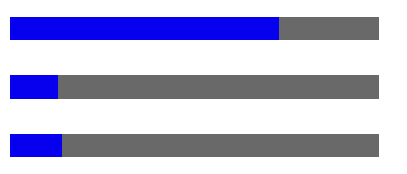

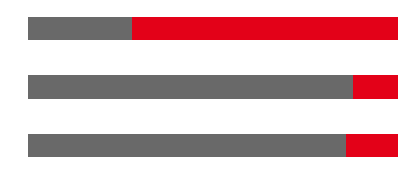

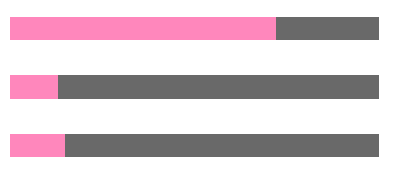

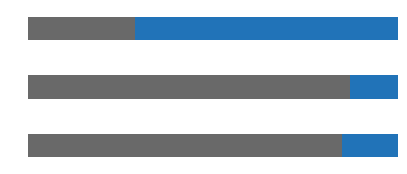

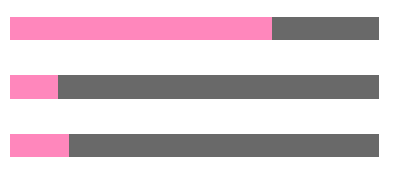

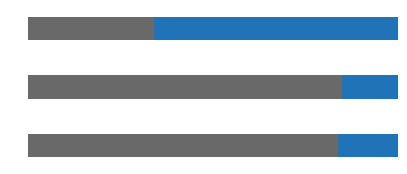

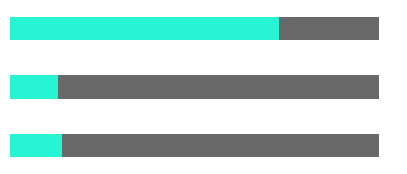

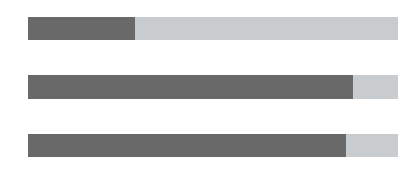

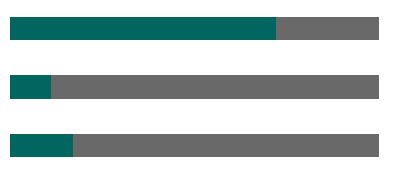

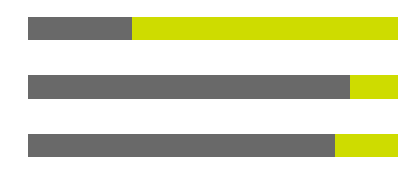

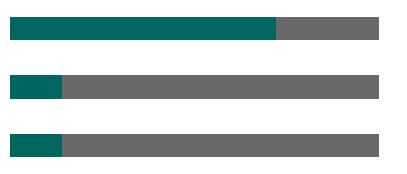

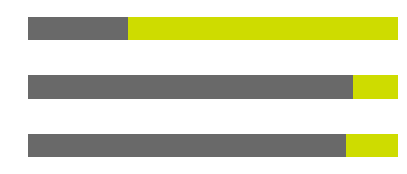

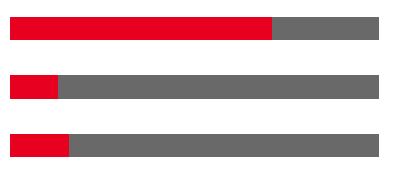

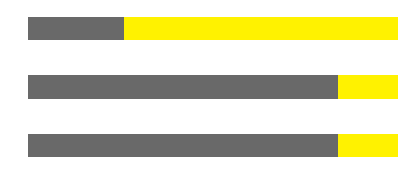

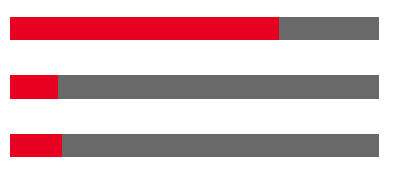

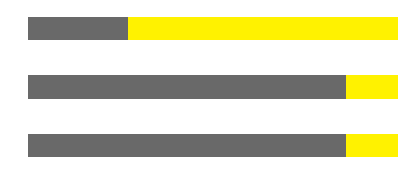

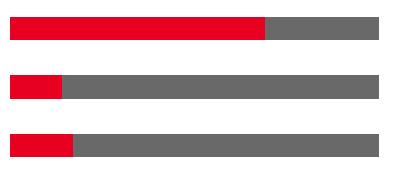

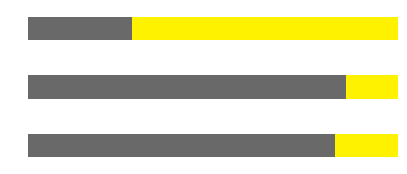

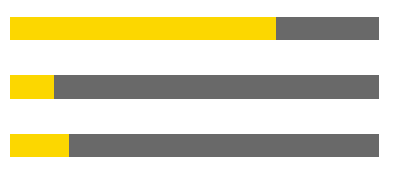

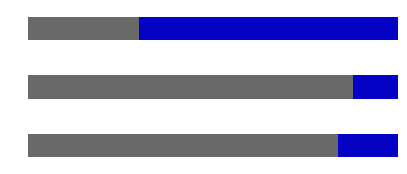

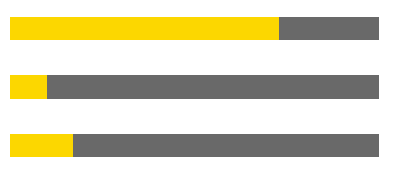

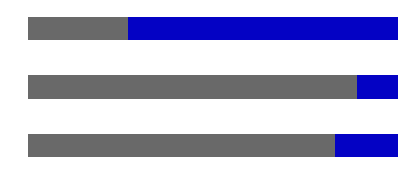

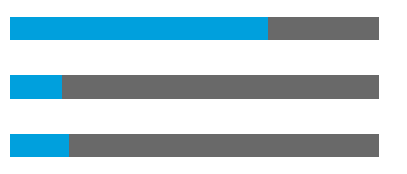

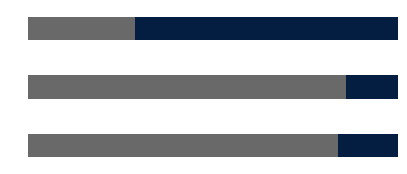

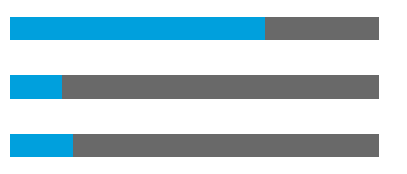

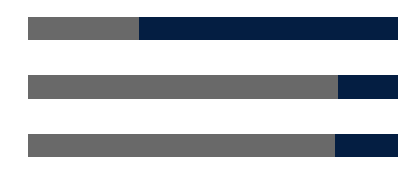

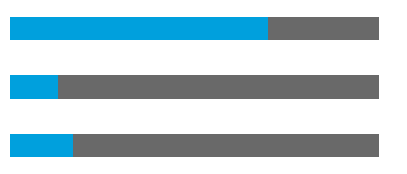

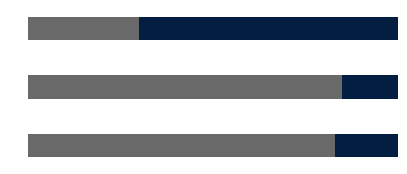

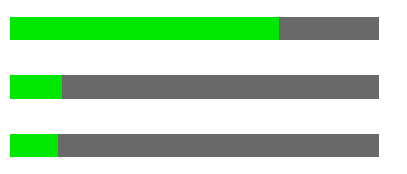

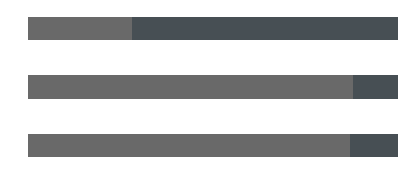

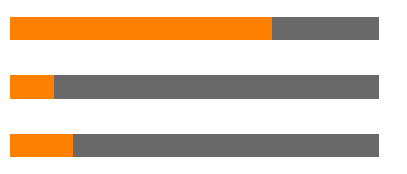

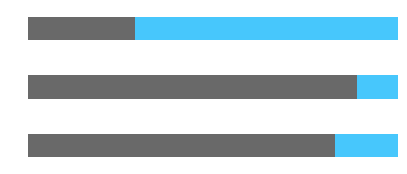

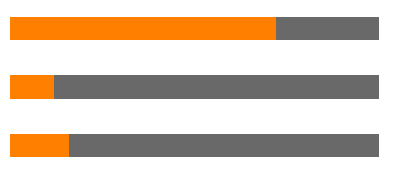

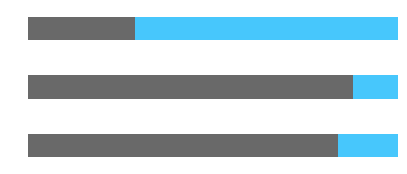

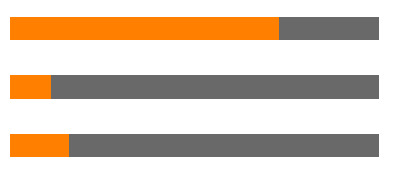

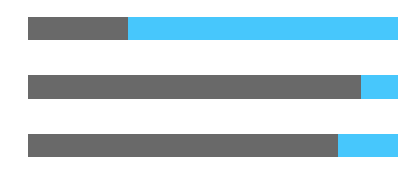

In [13]:
#year = int(input('Year ? '))
#race_number = int(input('Race Number ? '))
#race_session = input('Session ? ')

year = 2025
race_number = 1
race_session = 'Q'

session = fastf1.get_session(year, race_number, race_session)
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

teams = fastf1.plotting.list_team_names(session)
circuit_info = session.get_circuit_info()

delta_per_team = {}

start_time = time.time()

session= fastf1.get_session(year, race_number, race_session)
session.load()
q1, q2, q3 = session.laps.split_qualifying_sessions()
is_nat = np.isnat(q1['LapTime'])
q1 = q1[~is_nat]
is_nat = np.isnat(q2['LapTime'])
q2 = q2[~is_nat]
is_nat = np.isnat(q3['LapTime'])
q3 = q3[~is_nat]
teams = fastf1.plotting.list_team_names(session)


#circuit_info = session.get_circuit_info()

for idx, team in enumerate(teams):
    team_drivers = fastf1.plotting.get_driver_abbreviations_by_team(team, session=session)
    team_color = fastf1.plotting.get_team_color(team, session=session)
    df_color=pd.read_csv("../data/raw/second_color.csv", index_col='team')
    team_color_2 = df_color.loc[team][0]
    if team_drivers[0] in  q1['Driver'].values and team_drivers[1] in  q1['Driver'].values:
        sub_session = 'Q1'
        try:
            create_bar_graph_per_driver(team_drivers, q1)
        except:
            print(f'No data in {sub_session} for {team}')
    if team_drivers[0] in  q2['Driver'].values and team_drivers[1] in  q2['Driver'].values:
        sub_session = 'Q2'
        try:
            create_bar_graph_per_driver(team_drivers, q2)
        except:
            print(f'No data in {sub_session} for {team}')
    if team_drivers[0] in  q3['Driver'].values and team_drivers[1] in  q3['Driver'].values:
        sub_session = 'Q3'
        try:
            create_bar_graph_per_driver(team_drivers, q3)
        except:
            print(f'No data in {sub_session} for {team}')